In [1]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt

from probability import *
from aaa_algorithms import *
from spectral_transforms import *
from numerical import *

from example_measures import lmbda_1, lmbda_2, lmbda_3, lmbda_4

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=8)
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r"\usepackage{amsfonts}" + "\n" + r"\usepackage{amsmath}" + "\n" + r"\usepackage{amssymb}"
})

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


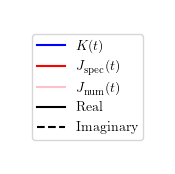

In [2]:
fig, ax = plt.subplots(figsize=(2, 2))

# Create empty lines with labels
ax.plot([], [], color="blue")
ax.plot([], [], color="red")
ax.plot([], [], color="pink")
ax.plot([], [], color="k")
ax.plot([], [], color="k", linestyle="--")
ax.axis('off')

# Create the legend
plt.legend(["$K(t)$", "$J_{\mathrm{spec}}(t)$", "$J_{\mathrm{num}}(t)$", "Real", "Imaginary"], bbox_to_anchor=[0.5, 0.5], loc='center', fontsize=10)

plt.savefig('figures/kernel_legend.pdf', bbox_inches='tight')

### Spectral and Numerical Inversion of Kernels with Spectrum $\lambda_1$

left and right roots found
Solving numerically with integration method
Generating, compiling, and loading C code.


ld: warning: duplicate -rpath '/Users/georgestepaniants/opt/anaconda3/lib' ignored


Using default integration parameters.


/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/jitcdde/_jitcdde.py:792: UserWarni

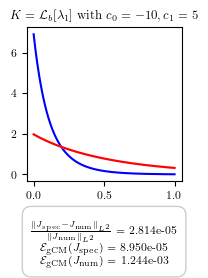

In [15]:
t = np.linspace(0, 1, 1000)
K = exp_kernel(lmbda_1, t)

c0 = -10
c1 = 5
mu_1, zeta0, zeta1 = B_real(lmbda_1, c0, c1)
J_spectral = exp_kernel(mu_1, t)

method = "integration"
J_numerical, _, _ = volterra_cm_numerical_inversion(lmbda_1, c0, c1, t, method)
rel_err = np.linalg.norm(J_spectral - J_numerical)/np.linalg.norm(J_numerical)

resolvent_err_spectral = volterra_cm_resolvent_eq_error(K, c0, c1, J_spectral, zeta0, zeta1, t)
resolvent_err_numerical = volterra_cm_resolvent_eq_error(K, c0, c1, J_numerical, zeta0, zeta1, t)

fig, ax = plt.subplots(figsize=(2, 2))
str = f"with $c_0={c0}, c_1={c1}$"
ax.set_title("$K = \mathcal{L}_b[\lambda_1]$ " + str, size=9)
ax.plot(t, np.real(K), color="blue")
ax.plot(t, np.real(J_numerical), color="pink")
ax.plot(t, np.real(J_spectral), color="red")

ax.annotate("$\\frac{\|J_{\mathrm{spec}} - J_{\mathrm{num}}\|_{L^2}}{\|J_{\mathrm{num}}\|_{L^2}}$" + f" = {rel_err:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gCM}}(J_{\mathrm{spec}})$" + f" = {resolvent_err_spectral:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gCM}}(J_{\mathrm{num}})$" + f" = {resolvent_err_numerical:.3e}",
            xy=(0.5, -0.25), xycoords='axes fraction',
            size=8, ha='center', va='top',
            bbox=dict(fc='w', edgecolor='k', alpha=0.2, boxstyle='round,pad=0.8'))
plt.savefig(f"figures/cm_lmbda1_{c0}_{c1}_inversion.pdf", bbox_inches='tight')
plt.show()

left and right roots found
Generating, compiling, and loading C code.


ld: warning: duplicate -rpath '/Users/georgestepaniants/opt/anaconda3/lib' ignored


Using default integration parameters.


/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/jitcdde/_jitcdde.py:792: UserWarni

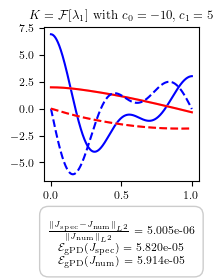

In [16]:
t = np.linspace(0, 1, 1000)
K = complex_exp_kernel(lmbda_1, t)

c0 = -10
c1 = 5
mu_1, zeta0, zeta1 = B_real(lmbda_1, c0, c1)
J_spectral = complex_exp_kernel(mu_1, t)

method = "integration"
J_numerical, _, _ = volterra_pd_numerical_inversion(lmbda_1, c0, c1, t, method)
rel_err = np.linalg.norm(J_spectral - J_numerical)/np.linalg.norm(J_numerical)

resolvent_err_spectral = volterra_pd_resolvent_eq_error(K, c0, c1, J_spectral, zeta0, zeta1, t)
resolvent_err_numerical = volterra_pd_resolvent_eq_error(K, c0, c1, J_numerical, zeta0, zeta1, t)

fig, ax = plt.subplots(figsize=(2, 2))
str = f"with $c_0={c0}, c_1={c1}$"
ax.set_title("$K = \mathcal{F}[\lambda_1]$ " + str, size=9)
ax.plot(t, np.real(K), color="blue")
ax.plot(t, np.real(J_numerical), color="pink")
ax.plot(t, np.real(J_spectral), color="red")
ax.plot(t, np.imag(K), linestyle="--", color="blue")
ax.plot(t, np.imag(J_numerical), linestyle="--",  color="pink")
ax.plot(t, np.imag(J_spectral), linestyle="--",  color="red")

ax.annotate("$\\frac{\|J_{\mathrm{spec}} - J_{\mathrm{num}}\|_{L^2}}{\|J_{\mathrm{num}}\|_{L^2}}$" + f" = {rel_err:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gPD}}(J_{\mathrm{spec}})$" + f" = {resolvent_err_spectral:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gPD}}(J_{\mathrm{num}})$" + f" = {resolvent_err_numerical:.3e}",
            xy=(0.5, -0.25), xycoords='axes fraction',
            size=8, ha='center', va='top',
            bbox=dict(fc='w', edgecolor='k', alpha=0.2, boxstyle='round,pad=0.8'))
plt.savefig(f"figures/pd_lmbda1_{c0}_{c1}_inversion.pdf", bbox_inches='tight')
plt.show()

### Spectral and Numerical Inversion of Kernels with Spectrum $\lambda_2$

Solving numerically with trapezoid method


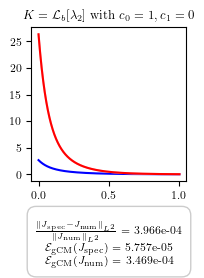

In [17]:
t = np.linspace(0, 1, 1000)
K = exp_kernel(lmbda_2, t)

c0 = 1
c1 = 0
mu_2, zeta0, zeta1 = B_real(lmbda_2, c0, c1)
J_spectral = exp_kernel(mu_2, t)

method = "trapezoid"
J_numerical, _, _ = volterra_cm_numerical_inversion(lmbda_2, c0, c1, t, method)
rel_err = np.linalg.norm(J_spectral - J_numerical)/np.linalg.norm(J_numerical)

resolvent_err_spectral = volterra_cm_resolvent_eq_error(K, c0, c1, J_spectral, zeta0, zeta1, t)
resolvent_err_numerical = volterra_cm_resolvent_eq_error(K, c0, c1, J_numerical, zeta0, zeta1, t)

fig, ax = plt.subplots(figsize=(2, 2))
str = f"with $c_0={c0}, c_1={c1}$"
ax.set_title("$K = \mathcal{L}_b[\lambda_2]$ " + str, size=9)
ax.plot(t, np.real(K), color="blue")
ax.plot(t, np.real(J_numerical), color="pink")
ax.plot(t, np.real(J_spectral), color="red")

ax.annotate("$\\frac{\|J_{\mathrm{spec}} - J_{\mathrm{num}}\|_{L^2}}{\|J_{\mathrm{num}}\|_{L^2}}$" + f" = {rel_err:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gCM}}(J_{\mathrm{spec}})$" + f" = {resolvent_err_spectral:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gCM}}(J_{\mathrm{num}})$" + f" = {resolvent_err_numerical:.3e}",
            xy=(0.5, -0.25), xycoords='axes fraction',
            size=8, ha='center', va='top',
            bbox=dict(fc='w', edgecolor='k', alpha=0.2, boxstyle='round,pad=0.8'))
plt.savefig(f"figures/cm_lmbda2_{c0}_{c1}_inversion.pdf", bbox_inches='tight')
plt.show()

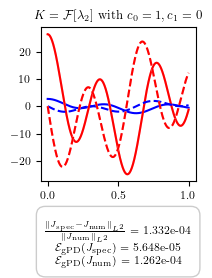

In [18]:
t = np.linspace(0, 1, 1000)
K = complex_exp_kernel(lmbda_2, t)

c0 = 1
c1 = 0
mu_2, zeta0, zeta1 = B_real(lmbda_2, c0, c1)
J_spectral = complex_exp_kernel(mu_2, t)

method = "trapezoid"
J_numerical, _, _ = volterra_pd_numerical_inversion(lmbda_2, c0, c1, t, method)
rel_err = np.linalg.norm(J_spectral - J_numerical)/np.linalg.norm(J_numerical)

resolvent_err_spectral = volterra_pd_resolvent_eq_error(K, c0, c1, J_spectral, zeta0, zeta1, t)
resolvent_err_numerical = volterra_pd_resolvent_eq_error(K, c0, c1, J_numerical, zeta0, zeta1, t)

fig, ax = plt.subplots(figsize=(2, 2))
str = f"with $c_0={c0}, c_1={c1}$"
ax.set_title("$K = \mathcal{F}[\lambda_2]$ " + str, size=9)
ax.plot(t, np.real(K), color="blue")
ax.plot(t, np.real(J_numerical), color="pink")
ax.plot(t, np.real(J_spectral), color="red")
ax.plot(t, np.imag(K), linestyle="--", color="blue")
ax.plot(t, np.imag(J_numerical), linestyle="--",  color="pink")
ax.plot(t, np.imag(J_spectral), linestyle="--",  color="red")

ax.annotate("$\\frac{\|J_{\mathrm{spec}} - J_{\mathrm{num}}\|_{L^2}}{\|J_{\mathrm{num}}\|_{L^2}}$" + f" = {rel_err:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gPD}}(J_{\mathrm{spec}})$" + f" = {resolvent_err_spectral:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gPD}}(J_{\mathrm{num}})$" + f" = {resolvent_err_numerical:.3e}",
            xy=(0.5, -0.25), xycoords='axes fraction',
            size=8, ha='center', va='top',
            bbox=dict(fc='w', edgecolor='k', alpha=0.2, boxstyle='round,pad=0.8'))
plt.savefig(f"figures/pd_lmbda2_{c0}_{c1}_inversion.pdf", bbox_inches='tight')
plt.show()

### Spectral and Numerical Inversion of Kernels with Spectrum $\lambda_3$

Solving numerically with trapezoid method


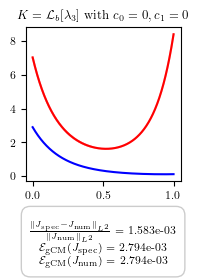

In [2]:
t = np.linspace(0, 1, 1000)
K = exp_kernel(lmbda_3, t)

c0 = 0
c1 = 0
mu_3, zeta0, zeta1 = B_real(lmbda_3, c0, c1)
J_spectral = exp_kernel(mu_3, t)

method = "trapezoid"
J_numerical, _, _ = volterra_cm_numerical_inversion(lmbda_3, c0, c1, t, method)
rel_err = np.linalg.norm(J_spectral - J_numerical)/np.linalg.norm(J_numerical)

resolvent_err_spectral = volterra_cm_resolvent_eq_error(K, c0, c1, J_spectral, zeta0, zeta1, t)
resolvent_err_numerical = volterra_cm_resolvent_eq_error(K, c0, c1, J_numerical, zeta0, zeta1, t)

fig, ax = plt.subplots(figsize=(2, 2))
str = f"with $c_0={c0}, c_1={c1}$"
ax.set_title("$K = \mathcal{L}_b[\lambda_3]$ " + str, size=9)
ax.plot(t, np.real(K), color="blue")
ax.plot(t, np.real(J_numerical), color="pink")
ax.plot(t, np.real(J_spectral), color="red")

ax.annotate("$\\frac{\|J_{\mathrm{spec}} - J_{\mathrm{num}}\|_{L^2}}{\|J_{\mathrm{num}}\|_{L^2}}$" + f" = {rel_err:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gCM}}(J_{\mathrm{spec}})$" + f" = {resolvent_err_spectral:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gCM}}(J_{\mathrm{num}})$" + f" = {resolvent_err_numerical:.3e}",
            xy=(0.5, -0.25), xycoords='axes fraction',
            size=8, ha='center', va='top',
            bbox=dict(fc='w', edgecolor='k', alpha=0.2, boxstyle='round,pad=0.8'))
plt.savefig(f"figures/cm_lmbda3_{c0}_{c1}_inversion.pdf", bbox_inches='tight')
plt.show()

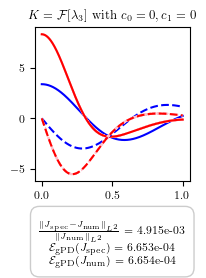

In [20]:
t = np.linspace(0, 1, 1000)
K = complex_exp_kernel(lmbda_3, t)

c0 = 0
c1 = 0
mu_3, zeta0, zeta1 = B_real(lmbda_3, c0, c1)
J_spectral = complex_exp_kernel(mu_3, t)

method = "trapezoid"
J_numerical, _, _ = volterra_pd_numerical_inversion(lmbda_3, c0, c1, t, method)
rel_err = np.linalg.norm(J_spectral - J_numerical)/np.linalg.norm(J_numerical)

resolvent_err_spectral = volterra_pd_resolvent_eq_error(K, c0, c1, J_spectral, zeta0, zeta1, t)
resolvent_err_numerical = volterra_pd_resolvent_eq_error(K, c0, c1, J_numerical, zeta0, zeta1, t)

fig, ax = plt.subplots(figsize=(2, 2))
str = f"with $c_0={c0}, c_1={c1}$"
ax.set_title("$K = \mathcal{F}[\lambda_3]$ " + str, size=9)
ax.plot(t, np.real(K), color="blue")
ax.plot(t, np.real(J_numerical), color="pink")
ax.plot(t, np.real(J_spectral), color="red")
ax.plot(t, np.imag(K), linestyle="--", color="blue")
ax.plot(t, np.imag(J_numerical), linestyle="--",  color="pink")
ax.plot(t, np.imag(J_spectral), linestyle="--",  color="red")

ax.annotate("$\\frac{\|J_{\mathrm{spec}} - J_{\mathrm{num}}\|_{L^2}}{\|J_{\mathrm{num}}\|_{L^2}}$" + f" = {rel_err:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gPD}}(J_{\mathrm{spec}})$" + f" = {resolvent_err_spectral:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gPD}}(J_{\mathrm{num}})$" + f" = {resolvent_err_numerical:.3e}",
            xy=(0.5, -0.25), xycoords='axes fraction',
            size=8, ha='center', va='top',
            bbox=dict(fc='w', edgecolor='k', alpha=0.2, boxstyle='round,pad=0.8'))
plt.savefig(f"figures/pd_lmbda3_{c0}_{c1}_inversion.pdf", bbox_inches='tight')
plt.show()

### Spectral and Numerical Inversion of Kernels with Spectrum $\lambda_4$

Generating, compiling, and loading C code.


ld: warning: duplicate -rpath '/Users/georgestepaniants/opt/anaconda3/lib' ignored


Using default integration parameters.


/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/jitcdde/_jitcdde.py:792: UserWarni

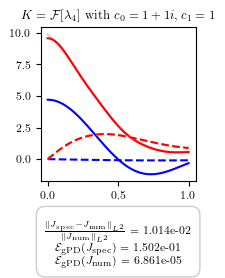

In [21]:
t = np.linspace(0, 1, 1000)
K = complex_exp_kernel(lmbda_4, t)

c0 = 1 + 1j
c1 = 1
mu_4, zeta0, zeta1 = B_real(lmbda_4, c0, c1)
J_spectral = complex_exp_kernel(mu_4, t)

method = "integration"
J_numerical, _, _ = volterra_pd_numerical_inversion(lmbda_4, c0, c1, t, method)
rel_err = np.linalg.norm(J_spectral - J_numerical)/np.linalg.norm(J_numerical)

resolvent_err_spectral = volterra_pd_resolvent_eq_error(K, c0, c1, J_spectral, zeta0, zeta1, t)
resolvent_err_numerical = volterra_pd_resolvent_eq_error(K, c0, c1, J_numerical, zeta0, zeta1, t)

fig, ax = plt.subplots(figsize=(2, 2))
str = f"with $c_0=1+1i, c_1={c1}$"
ax.set_title("$K = \mathcal{F}[\lambda_4]$ " + str, size=9)
ax.plot(t, np.real(K), color="blue")
ax.plot(t, np.real(J_numerical), color="pink")
ax.plot(t, np.real(J_spectral), color="red")
ax.plot(t, np.imag(K), linestyle="--", color="blue")
ax.plot(t, np.imag(J_numerical), linestyle="--",  color="pink")
ax.plot(t, np.imag(J_spectral), linestyle="--",  color="red")

ax.annotate("$\\frac{\|J_{\mathrm{spec}} - J_{\mathrm{num}}\|_{L^2}}{\|J_{\mathrm{num}}\|_{L^2}}$" + f" = {rel_err:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gPD}}(J_{\mathrm{spec}})$" + f" = {resolvent_err_spectral:.3e}" + "\n" +
            "$\mathcal{E}_{\mathrm{gPD}}(J_{\mathrm{num}})$" + f" = {resolvent_err_numerical:.3e}",
            xy=(0.5, -0.25), xycoords='axes fraction',
            size=8, ha='center', va='top',
            bbox=dict(fc='w', edgecolor='k', alpha=0.2, boxstyle='round,pad=0.8'))
plt.savefig(f"figures/pd_lmbda4_{c0}_{c1}_inversion.pdf", bbox_inches='tight')
plt.show()